In [1]:
import pandas as pd
import numpy as np

In [2]:
prepared_PG = pd.read_csv('./prepared_packguide.csv')
prepared_KLSS = pd.read_csv('./prepared_KittingRaw.csv')

In [3]:
prepared_PG

,Recipe Code,E,H,M,VE,VH,Meal Kits/Crate
0,17A2,2,2,1,2,1,5
1,17B2,2,0,2,2,0,6
2,17C2,1,2,1,2,0,6
3,17D2,3,0,3,2,0,5
4,17E2,3,0,1,3,1,6
...,...,...,...,...,...,...,...
202,23P4,2,4,3,3,2,3
203,23Q4,2,1,2,4,0,5
204,23R4,2,4,2,0,0,5
205,23S4,4,4,1,4,0,5


In [4]:
prepared_KLSS

,Recipe Code,Pickers Count,Time Consumption,P
0,17C4,2.0,8.00,4P
1,17C4,2.0,5.00,4P
2,17C4,2.0,7.00,4P
3,17C4,2.0,5.00,4P
4,17C4,2.0,8.00,4P
...,...,...,...,...
36470,23M4,2.0,4.55,4P
36471,23M4,2.0,3.48,4P
36472,23M4,2.0,3.43,4P
36473,23M4,2.0,2.55,4P


In [5]:
training_all = prepared_KLSS.merge(prepared_PG, how = 'left', left_on = 'Recipe Code', right_on = 'Recipe Code')
training_all.describe()

,Pickers Count,Time Consumption,E,H,M,VE,VH,Meal Kits/Crate
count,36475.000000,36475.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000
mean,3.011844,4.512951,2.239211,1.782119,2.537287,2.856939,0.864287,4.584115
std,0.657103,1.274222,1.528227,1.762263,1.653221,1.578110,1.289825,1.099727
min,0.000000,2.020000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,3.000000,3.670000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000
50%,3.000000,4.270000,2.000000,1.000000,2.000000,3.000000,0.000000,4.000000
75%,3.000000,5.120000,3.000000,3.000000,4.000000,4.000000,2.000000,5.000000
max,5.000000,9.980000,8.000000,9.000000,8.000000,11.000000,7.000000,8.000000


In [6]:
training_2P = training_all.groupby('P').get_group('2P')
training_2P.describe()

,Pickers Count,Time Consumption,E,H,M,VE,VH,Meal Kits/Crate
count,14915.000000,14915.000000,14915.000000,14915.000000,14915.000000,14915.000000,14915.000000,14915.000000
mean,3.001140,4.585383,2.083741,1.213946,2.107476,2.419242,0.467851,5.289172
std,0.690215,1.309838,1.249015,1.214058,1.269206,1.219106,0.729617,1.073215
min,0.000000,2.020000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,3.000000,3.720000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000
50%,3.000000,4.350000,2.000000,1.000000,2.000000,2.000000,0.000000,5.000000
75%,3.000000,5.230000,3.000000,2.000000,3.000000,3.000000,1.000000,6.000000
max,5.000000,9.980000,5.000000,4.000000,5.000000,6.000000,3.000000,8.000000


In [7]:
training_4P = training_all.groupby('P').get_group('4P')
training_4P.describe()

,Pickers Count,Time Consumption,E,H,M,VE,VH,Meal Kits/Crate
count,21559.000000,21559.000000,21559.000000,21559.000000,21559.000000,21559.000000,21559.000000,21559.000000
mean,3.019250,4.462841,2.346769,2.175194,2.834640,3.159748,1.138550,4.096340
std,0.633108,1.246588,1.686342,1.963831,1.814777,1.720764,1.504133,0.816977
min,0.000000,2.020000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,3.000000,3.630000,1.000000,1.000000,1.000000,2.000000,0.000000,4.000000
50%,3.000000,4.200000,2.000000,2.000000,3.000000,3.000000,0.000000,4.000000
75%,3.000000,5.030000,3.000000,3.000000,4.000000,4.000000,2.000000,5.000000
max,5.000000,9.980000,8.000000,9.000000,8.000000,11.000000,7.000000,7.000000


In [8]:
# 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [9]:
# Hypothesis 1 : Assusing 2P and 4P recipes have significant difference in kitting speed

# Predicting for 2P recipes first
train_2P = training_2P.drop(columns = ['Recipe Code', 'P']).reset_index(drop = True) # drop data type "object" -- only numreic data kept
train_2P

,Pickers Count,Time Consumption,E,H,M,VE,VH,Meal Kits/Crate
0,3.0,6.00,3.0,0.0,3.0,2.0,0.0,5.0
1,3.0,6.00,3.0,0.0,3.0,2.0,0.0,5.0
2,3.0,5.00,3.0,0.0,3.0,2.0,0.0,5.0
3,3.0,4.00,3.0,0.0,3.0,2.0,0.0,5.0
4,3.0,5.00,3.0,0.0,3.0,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...
14910,3.0,4.48,3.0,2.0,1.0,3.0,1.0,4.0
14911,3.0,5.42,3.0,2.0,1.0,3.0,1.0,4.0
14912,3.0,4.83,3.0,2.0,1.0,3.0,1.0,4.0
14913,3.0,5.33,3.0,2.0,1.0,3.0,1.0,4.0


In [10]:
# pip freeze > requirements.txt

In [11]:
X = train_2P[['Pickers Count', 'E', 'H', 'M', 'VE', 'VH', 'Meal Kits/Crate']]
y = train_2P['Time Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
my_forest = RandomForestRegressor(n_estimators = 50, random_state = 0)
my_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [13]:
predicted_time = my_forest.predict(X_test)

In [14]:
mean_absolute_error(y_test, predicted_time) 
# first naive try MAE score for 2P recipes -- 0.8375554028815221 (min)

0.8375574809339555

,Pickers Count,Time Consumption,E,H,M,VE,VH,Meal Kits/Crate
0,3.0,6.00,3.0,0.0,3.0,2.0,0.0,5.0
1,3.0,6.00,3.0,0.0,3.0,2.0,0.0,5.0
2,3.0,5.00,3.0,0.0,3.0,2.0,0.0,5.0
3,3.0,4.00,3.0,0.0,3.0,2.0,0.0,5.0
4,3.0,5.00,3.0,0.0,3.0,2.0,0.0,5.0
...,...,...,...,...,...,...,...,...
14910,3.0,4.48,3.0,2.0,1.0,3.0,1.0,4.0
14911,3.0,5.42,3.0,2.0,1.0,3.0,1.0,4.0
14912,3.0,4.83,3.0,2.0,1.0,3.0,1.0,4.0
14913,3.0,5.33,3.0,2.0,1.0,3.0,1.0,4.0


In [15]:
# use the speed (mk/hour) instead of the time (Time Consumption)
train_2P['mk/h'] = train_2P['Meal Kits/Crate'] * 7 * 60 / train_2P['Time Consumption']
train_2P.drop(columns = ['Time Consumption'])

,Pickers Count,E,H,M,VE,VH,Meal Kits/Crate,mk/h
0,3.0,3.0,0.0,3.0,2.0,0.0,5.0,350.000000
1,3.0,3.0,0.0,3.0,2.0,0.0,5.0,350.000000
2,3.0,3.0,0.0,3.0,2.0,0.0,5.0,420.000000
3,3.0,3.0,0.0,3.0,2.0,0.0,5.0,525.000000
4,3.0,3.0,0.0,3.0,2.0,0.0,5.0,420.000000
...,...,...,...,...,...,...,...,...
14910,3.0,3.0,2.0,1.0,3.0,1.0,4.0,375.000000
14911,3.0,3.0,2.0,1.0,3.0,1.0,4.0,309.963100
14912,3.0,3.0,2.0,1.0,3.0,1.0,4.0,347.826087
14913,3.0,3.0,2.0,1.0,3.0,1.0,4.0,315.196998


In [16]:
X = train_2P[['Pickers Count', 'E', 'H', 'M', 'VE', 'VH', 'Meal Kits/Crate']]
y = train_2P['mk/h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
my_forest = RandomForestRegressor(n_estimators = 50, random_state = 0)
my_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [17]:
predicted_speed = my_forest.predict(X_test)
mean_absolute_error(y_test, predicted_speed) 
# first naive try MAE score for 2P recipes -- 93.1241887108631 (mk/h)

93.1241887108631

In [18]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [19]:
# naive_forest = RandomForestRegressor()
# RFR_rd = RandomizedSearchCV(estimator = naive_forest, param_distributions = random_grid, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
# RFR_rd.fit(X_train,y_train)
# RFR_rd.best_params_

In [20]:
# optimized_model = RandomForestRegressor(n_estimators = 2000, min_samples_split = 5, min_samples_leaf = 2, max_features = 'auto', max_depth = 50, bootstrap = True)
# optimized_model.fit(X_train, y_train)
# optimized_predicted_speed = optimized_model.predict(X_test)
# mean_absolute_error(y_test, optimized_predicted_speed) 
# # Optimized MAE score: 93.14699628993233

In [21]:
def EvaluatingFunction(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    

In [22]:
EvaluatingFunction(my_forest, X_test, y_test)

Model Performance
Average Error: 93.1242 degrees.
Accuracy = 80.25%.


In [23]:
from sklearn.inspection import plot_partial_dependence

In [24]:
features = list(X_test.columns)

c:\users\peiran quan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass feature_names=['Pickers Count', 'E', 'H', 'M', 'VE', 'VH', 'Meal Kits/Crate'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\peiran quan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass feature_names=['Pickers Count', 'E', 'H', 'M', 'VE', 'VH', 'Meal Kits/Crate'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\peiran quan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass feature_names=['Pickers Count', 'E', 'H', 'M', 'VE', 'VH', 'Meal Kits/Crate'] as keyword args. From version 0.25 passing these 

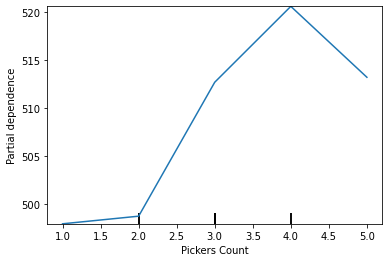

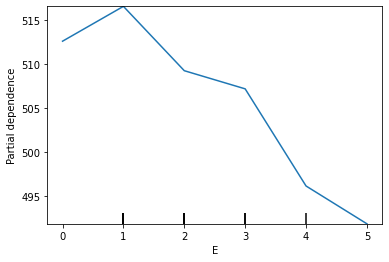

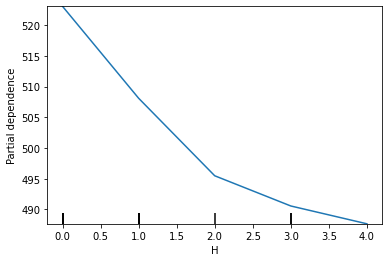

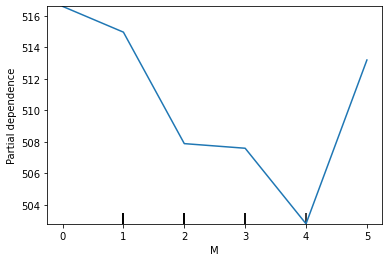

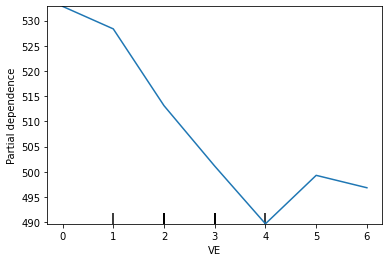

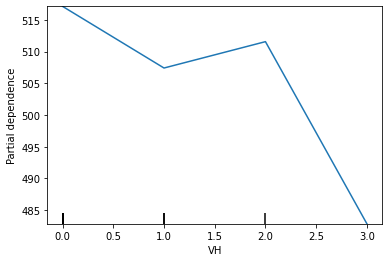

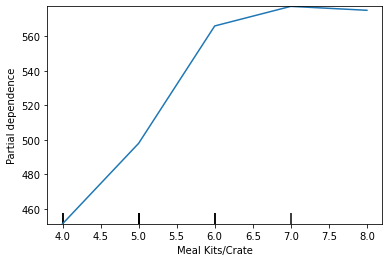

In [25]:
for i in range(7):
    plot_partial_dependence(my_forest, X_test, [i], features)

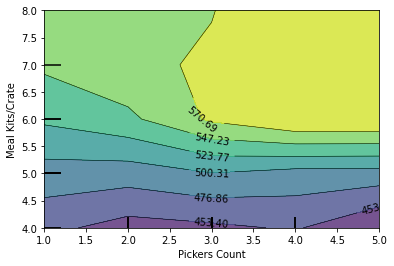

In [26]:
plot_partial_dependence(my_forest, X_test, [(0,6)])